In [ ]:
import os

In [2]:
#Importando arquivo compactado
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-04-18 23:55:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.207, 142.251.163.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  33.1MB/s    in 2.0s    

2024-04-18 23:55:56 (33.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
#Descompactando arquivo
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [5]:
#Excluindo arquivo compactado
!rm -rf cats_and_dogs_filtered.zip

In [7]:
#instalando tensorflow
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.3 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 46.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 28.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 8.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.6 

In [9]:
#importando as bibliotecas
import os
import matplotlib.pyplot as plt
import tensorflow as tf

2024-04-19 00:02:57.824320: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 00:02:58.188421: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 00:02:58.433981: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 00:02:59.682443: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
#criando os diretórios
dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

print('Train Cats: %s' % dataset_train_cats_len)
print('Train Dogs: %s' % dataset_train_dogs_len)
print('Validation Cats: %s' % dataset_validation_cats_len)
print('Validation Dogs: %s' % dataset_validation_dogs_len)

Train Cats: 1000
Train Dogs: 1000
Validation Cats: 500
Validation Dogs: 500


In [15]:
#convertendo tamanho das imagens de 160 x 160
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32 #quantidade de features por vez. 32 é default
epochs = 20 #épocas
learning_rate = 0.0001 #taxa de aprendizagem

class_names = ['cat', 'dog'] #saída (array), sendo posição 0 para cat e 1 para dog

In [16]:
#objeto dataset de treino. retorna um objeto dataset de acordo com o path que envia como argumento, 
#que no caso é o dataset_train_dir
#usado para efetivamente atualizar os parãmetros da rede neural
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2000 files belonging to 2 classes.


In [17]:
#objeto dataset de validação. retorna um objeto dataset de acordo com o path que envia como argumento, 
#que no caso é o dataset_validation_dir
#usado para validar o modelo durante o treinamento, mas não é utilizado para modificar os parâmetros
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 1000 files belonging to 2 classes.


In [20]:
#dataset teste construído com base em um pedaço do dataset validação.
# neste caso, está sendo direcionado a quinta parte para teste
#a cardinalidade inicial é de 1000/32 = 31.25
# o dataset de teste fica com cardinalidade 6 * 32 imagens (features)
# e dataset de validação fica com cardinalidade 26 * 32 imagens (features)
#esse dataset será utilizado no final para testar o modelo
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 21
Test Dataset Cardinality: 5


In [21]:
#função para plotar algumas imagens do dataset

def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15,15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3,3,i+1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

2024-04-19 00:42:15.113305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Figure size 640x480 with 0 Axes>

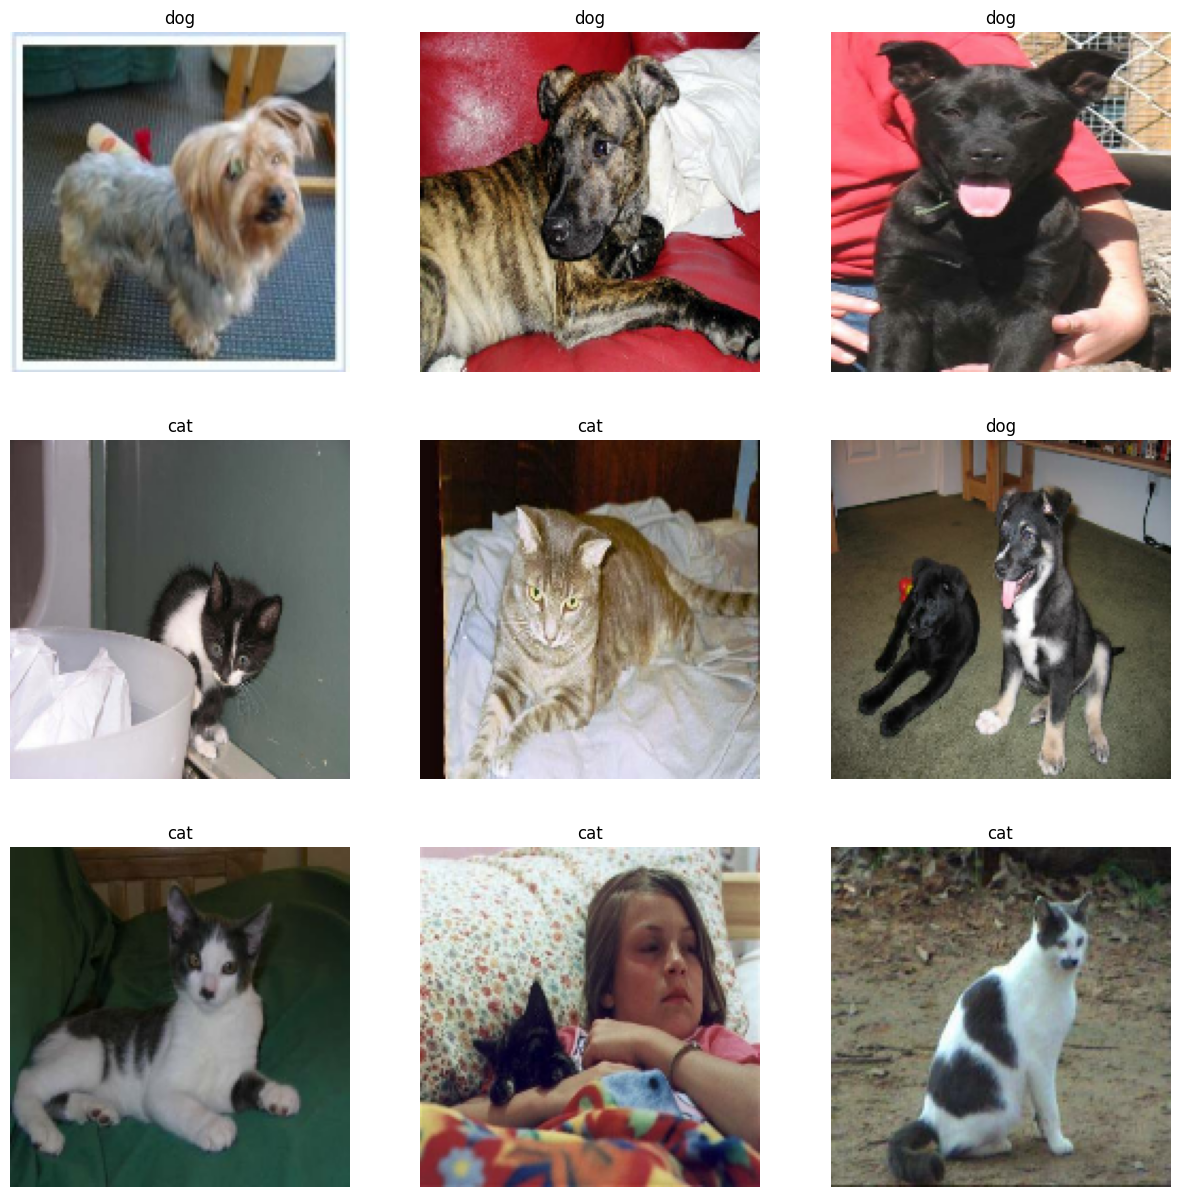

In [22]:
plot_dataset(dataset_train)

2024-04-19 00:42:49.251905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Figure size 640x480 with 0 Axes>

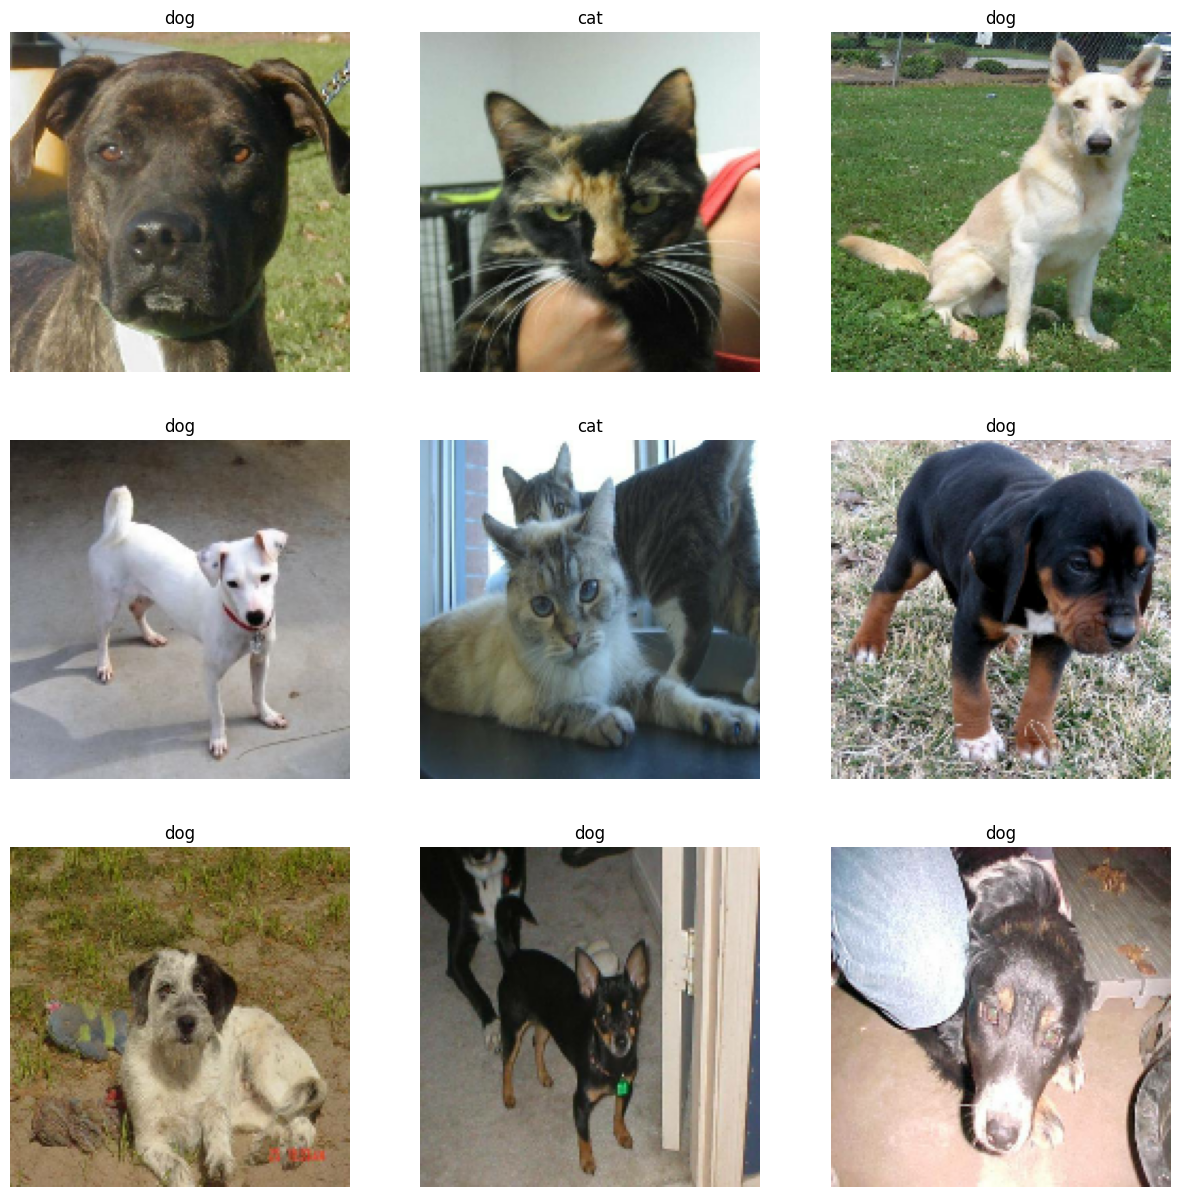

In [23]:
plot_dataset(dataset_validation)

2024-04-19 00:43:25.843290: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Figure size 640x480 with 0 Axes>

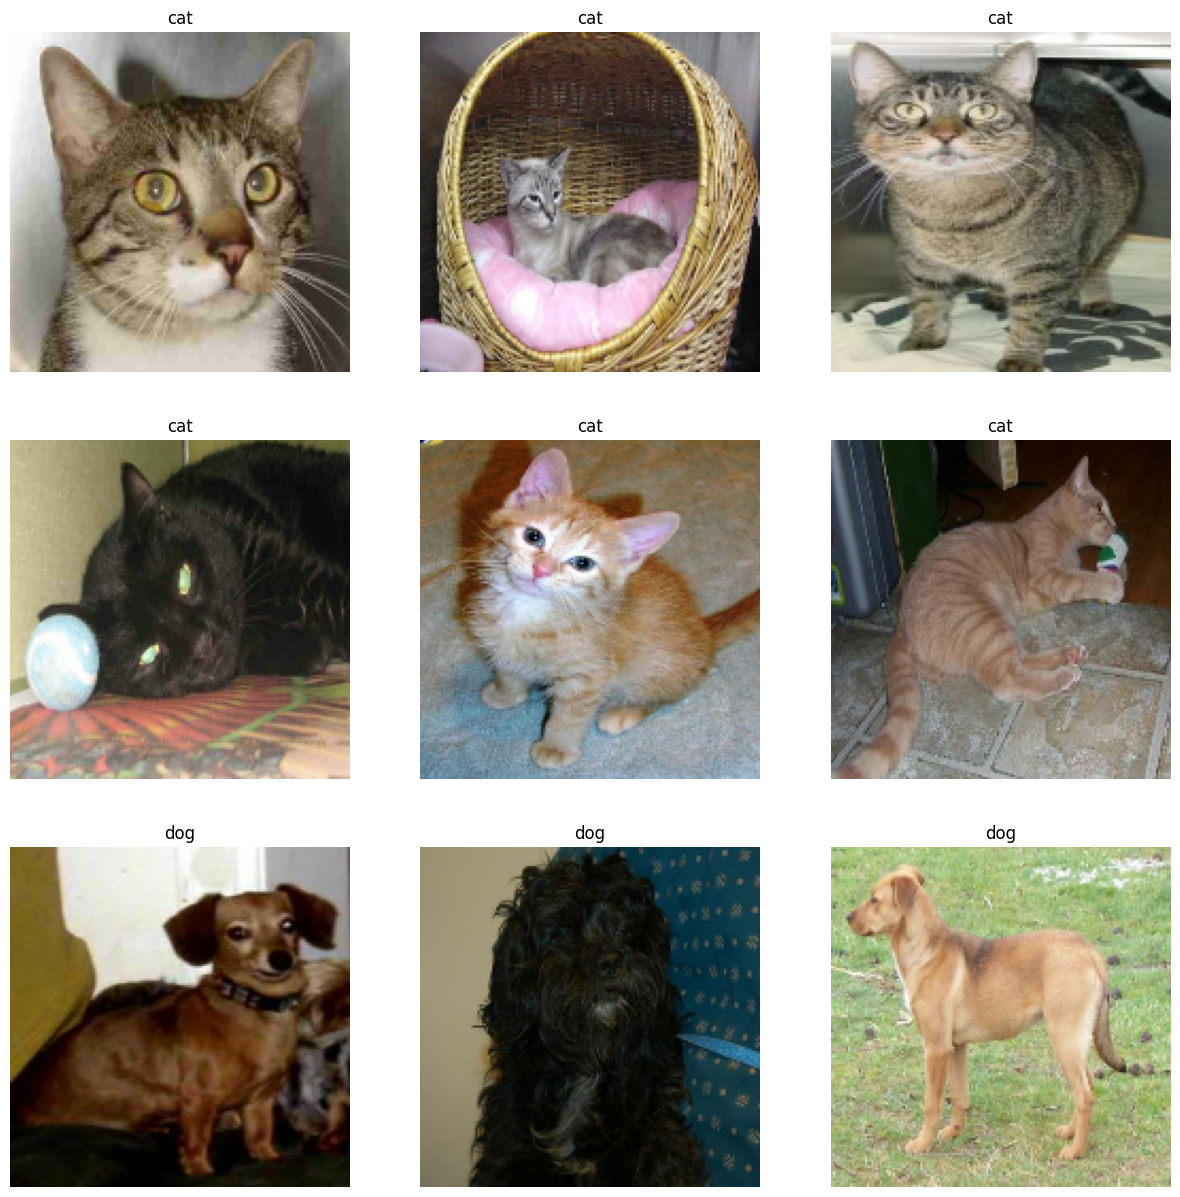

In [24]:
plot_dataset(dataset_test)

In [28]:
#criando o modelo do tipo sequencial, para que uma camada seja aplicada após a outra em sequencia


model = tf.keras.models.Sequential([
    #primeira etapa é responsável por fazer o granscale 160 x 160
    #normalização de valores para que vá de 0 a 1 e não de 0 a 255
    tf.keras.layers.Rescaling(
        1. / image_color_channel_size,
        input_shape = image_shape
    ),
    #camada convulacional de tamanho 16, que significa que irá passar a kernel 16 vezes
    # 3 é o tamanho da kernel 3x3
    # padding='same' permite adicionar zeros ao redor da feature
    # função de ativação que é aplicada na saída da camada e a relu zera o valor negativo e permanece com positivo
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    #consolida o activaction map da camada convulucional
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    #aplica algoritmo que irá achatar tudo 
    tf.keras.layers.Flatten(),
    #aplica uma camada com 128 nós que serão atualizados durante o treinamento
    tf.keras.layers.Dense(128, activation= 'relu'),
    #quero apenas 1 valor na saída. e a sigmoid retorna sempre -1 e 1 independente do valor que chegar nela
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

#calcula o valor do erro (backpropagation) de acordo com a entrada e a saída
#Adam busca as melhores configurações para um menor erro possível
#learning_rate é a taxa de aprendizagem, para encontrar o menor erro possível
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 160, 160, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,300,641 (12.59 MB)

 Trainable params: 3,300,641 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs
)

Epoch 1/20


2024-04-19 01:18:26.385827: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52428800 exceeds 10% of free system memory.
2024-04-19 01:18:26.804895: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.
2024-04-19 01:18:26.988405: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25804800 exceeds 10% of free system memory.
2024-04-19 01:18:27.112170: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.
2024-04-19 01:18:27.144112: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25804800 exceeds 10% of free system memory.


63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 549ms/step - accuracy: 0.5207 - loss: 0.7022 - val_accuracy: 0.5880 - val_loss: 0.6675
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 528ms/step - accuracy: 0.6062 - loss: 0.6613 - val_accuracy: 0.6466 - val_loss: 0.6253
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 517ms/step - accuracy: 0.6674 - loss: 0.6146 - val_accuracy: 0.6883 - val_loss: 0.6089
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 519ms/step - accuracy: 0.6922 - loss: 0.6000 - val_accuracy: 0.7052 - val_loss: 0.5981
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 500ms/step - accuracy: 0.7278 - loss: 0.5575 - val_accuracy: 0.7114 - val_loss: 0.5881
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 495ms/step - accuracy: 0.7314 - loss: 0.5414 - val_accuracy: 0.7099 - val_loss: 0.5815
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 523ms/step - accuracy: 0.7496 - loss: 0.5286 - val_accuracy: 0.7315 - val_loss: 0.5570
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 505ms/step - accuracy: 0.7620 - loss: 0.4980 - val_accuracy: 0.731

In [30]:
#
def plot_dataset_predictions(dataset):
    features, labels = dataset.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize= (15,15))

    for i in range(9):
        plt.subplot(3,3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

Labels:      [1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0]
Predictions: [1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0]


<Figure size 640x480 with 0 Axes>

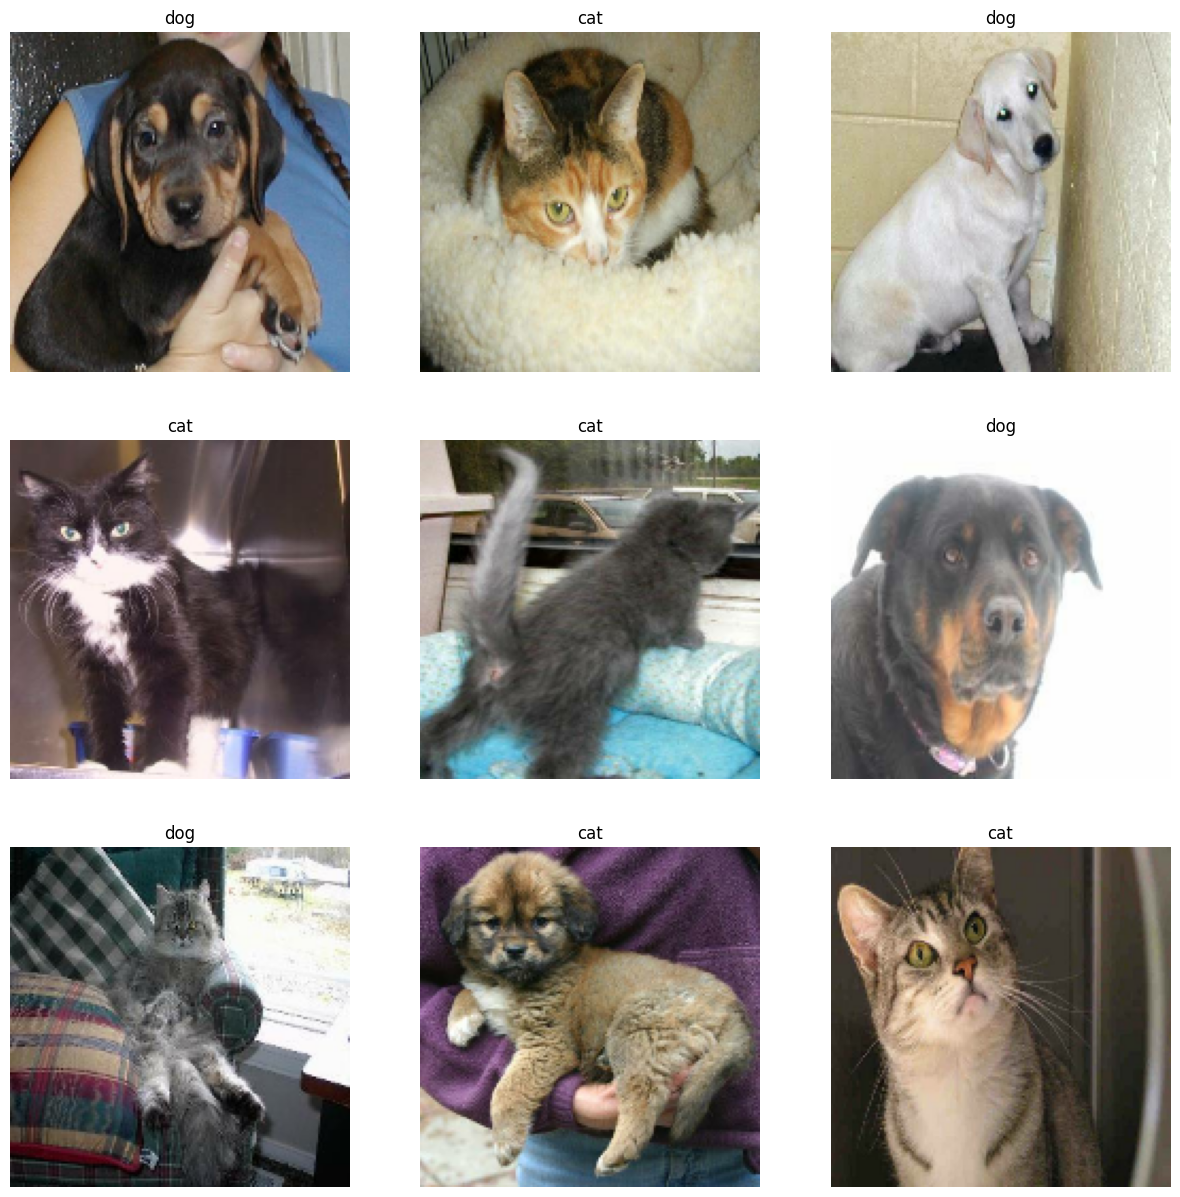

In [31]:
plot_dataset_predictions(dataset_test)

In [33]:
#salvando modelo para enviar para produção
# Verifica se o diretório existe. Se não, cria o diretório.
directory = 'path/to'
if not os.path.exists(directory):
    os.makedirs(directory)

model.save('path/to/model.keras')

In [34]:
#carregando modelo
model = tf.keras.models.load_model('path/to/model.keras')

In [ ]:
#plotando a performance do modelo
def plot_model():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize= (15,8))

    plt.subplot(1,2,1)
    plt.title('Traing and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')

    plt.subplot(1,2,2)
    plt.title('Training anda Validation Loss')
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Training Loss')
    plt.legend(loc= 'lower right')

    plt.show()